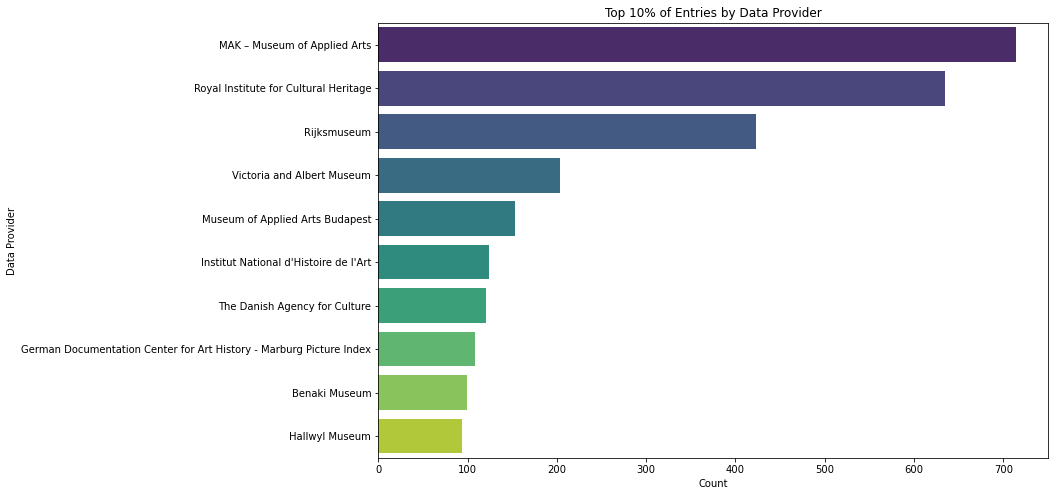

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json

# Load the JSON data
with open('chinese_porcelain_metadata.json', 'r') as file:
    data = json.load(file)

# Extract dataProvider information
data_providers = []
for item in data:
    if 'dataProvider' in item and isinstance(item['dataProvider'], list):
        data_providers.extend(item['dataProvider'])

# Count occurrences of each data provider
provider_counts = Counter(data_providers)

# Define the percentage of top providers to display
top_percentage = 0.10  # For example, show the top 10%

# Calculate the number of top providers to show
total_providers = len(provider_counts)
top_count = int(total_providers * top_percentage)

# Get the top providers
top_providers = provider_counts.most_common(top_count)

# Convert to separate lists for plotting
providers, counts = zip(*top_providers) if top_providers else ([], [])

# Bar Chart for Top Data Providers
plt.figure(figsize=(12, 8))
sns.barplot(y=list(providers), x=list(counts), palette='viridis')
plt.title(f'Top {int(top_percentage * 100)}% of Entries by Data Provider')
plt.xlabel('Count')
plt.ylabel('Data Provider')
plt.show()

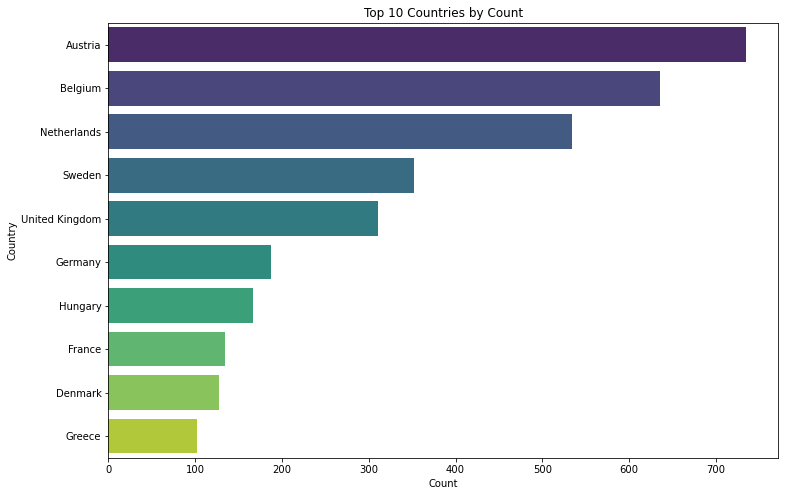

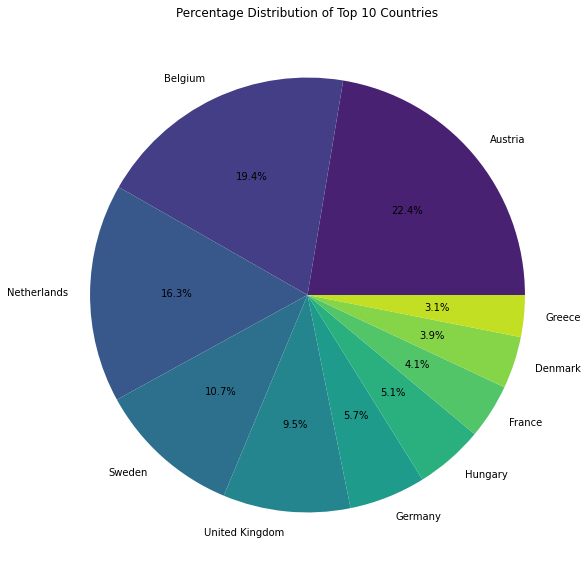

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json

# Load your JSON data
with open('chinese_porcelain_metadata.json', 'r') as file:
    data = json.load(file)

# Extract country information
countries = []
for item in data:
    if 'country' in item and isinstance(item['country'], list):
        countries.extend(item['country'])

# Count occurrences of each country
country_counts = Counter(countries)

# Define the number of top countries to display
top_n = 10

# Get the top N countries
top_countries = country_counts.most_common(top_n)

# Convert to separate lists for plotting
countries_list, counts_list = zip(*top_countries) if top_countries else ([], [])

# Bar Chart for Top Countries
plt.figure(figsize=(12, 8))
sns.barplot(y=list(countries_list), x=list(counts_list), palette='viridis')
plt.title(f'Top {top_n} Countries by Count')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

# Pie Chart for Top Countries
plt.figure(figsize=(10, 10))
plt.pie(counts_list, labels=countries_list, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(countries_list)))
plt.title(f'Percentage Distribution of Top {top_n} Countries')
plt.show()

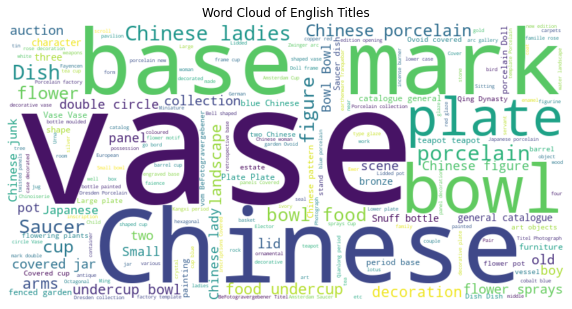

In [27]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json

# Load the JSON data
with open('chinese_porcelain_metadata.json', 'r') as file:
    data = json.load(file)

# Extract English titles from dcTitle
english_titles = []
for item in data:
    if 'dcTitleLangAware' in item and 'en' in item['dcTitleLangAware']:
        english_titles.extend(item['dcTitleLangAware']['en'])

# Combine all titles into a single string
titles_text = ' '.join(english_titles)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(titles_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of English Titles')
plt.show()

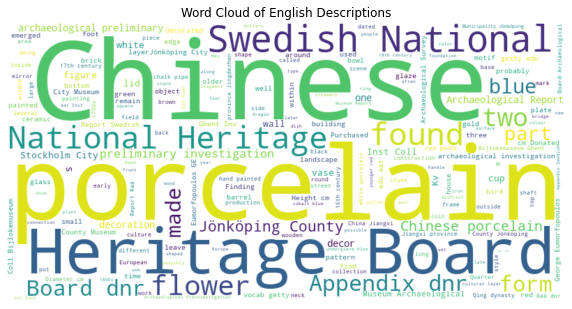

In [28]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import json

# Load the JSON data
with open('chinese_porcelain_metadata.json', 'r') as file:
    data = json.load(file)

# Extract English descriptions from dcDescriptionLangAware
english_descriptions = []
for item in data:
    if 'dcDescriptionLangAware' in item and 'en' in item['dcDescriptionLangAware']:
        english_descriptions.extend(item['dcDescriptionLangAware']['en'])

# Combine all descriptions into a single string
descriptions_text = ' '.join(english_descriptions)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(descriptions_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of English Descriptions')
plt.show()

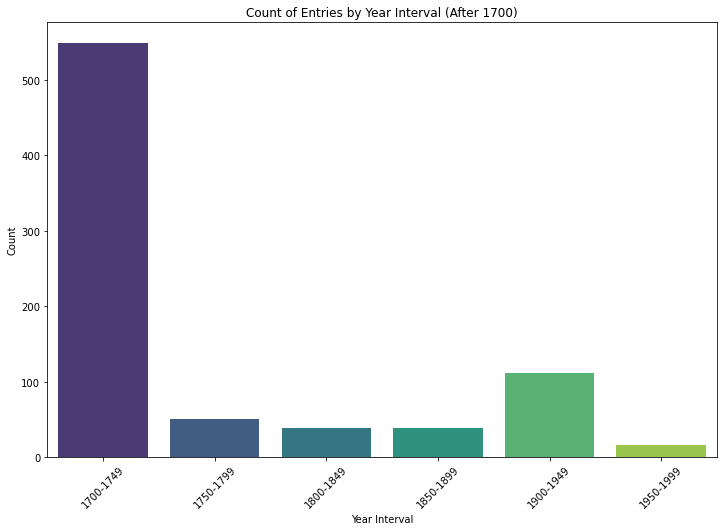

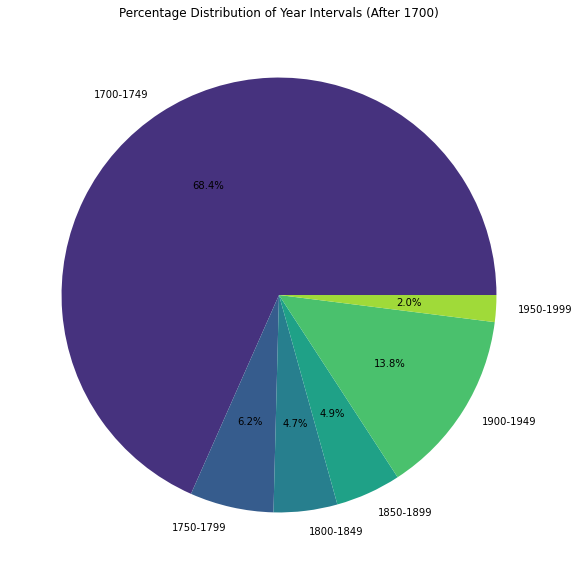

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import json
import numpy as np

# Load the JSON data
with open('chinese_porcelain_metadata.json', 'r') as file:
    data = json.load(file)

# Extract year information
years = []
for item in data:
    if 'year' in item:
        # Handle if 'year' is a list or a complex structure
        if isinstance(item['year'], list):
            years.extend(item['year'])
        else:
            years.append(item['year'])

# Convert all year data to integers and filter out years before 1700
years = [int(year) for year in years if year.isdigit() and int(year) > 1700]

# Define year bins
bins = range(1700, 2020, 50)  # Adjust the range and bin size as needed
labels = [f'{bins[i]}-{bins[i+1]-1}' for i in range(len(bins)-1)]

# Bin the years
year_bins = np.digitize(years, bins) - 1

# Count occurrences in each bin
bin_counts = Counter(year_bins)

# Prepare data for plotting
# Ensure that all bin labels are present in the bin_counts
bin_labels = [labels[i] for i in range(len(labels)) if i in bin_counts]
bin_values = [bin_counts[i] for i in range(len(labels)) if i in bin_counts]

# Bar Chart for Year Bins
plt.figure(figsize=(12, 8))
sns.barplot(x=bin_labels, y=bin_values, palette='viridis')
plt.title('Count of Entries by Year Interval (After 1700)')
plt.xlabel('Year Interval')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate interval labels for better readability
plt.show()

# Pie Chart for Year Bins
plt.figure(figsize=(10, 10))
plt.pie(bin_values, labels=bin_labels, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(bin_values)))
plt.title('Percentage Distribution of Year Intervals (After 1700)')
plt.show()

In [44]:
import json
import re
from collections import defaultdict

# Define a regex pattern to identify possible excluded terms
pattern = re.compile(r'(unknown|inconnu|未知|不明|missing|manquant|absent)', re.IGNORECASE)

# Load the JSON data
with open('chinese_porcelain_metadata.json', 'r') as file:
    data = json.load(file)

# Dictionary to keep track of terms that match the pattern
excluded_terms = defaultdict(set)

# Scan through the JSON data to find terms that match the pattern
for item in data:
    if 'dcCreator' in item and isinstance(item['dcCreator'], list):
        for creator in item['dcCreator']:
            if pattern.search(creator):
                excluded_terms[creator].add(creator)

# Print all unique excluded terms found in the dataset
unique_excluded_terms = set(excluded_terms.keys())
print("Unique excluded terms found in the dataset:")
for term in unique_excluded_terms:
    print(term)

# Optionally, save the excluded terms to a file
with open('excluded_terms.txt', 'w') as file:
    for term in unique_excluded_terms:
        file.write(f"{term}\n")

Unique excluded terms found in the dataset:
Unknown (ceramic)
Unknown (ceramist)
unknown
inconnu (céramiste)
Unknown (goldsmith)
inconnu
Unknown
inconnu (orfèvre)


In [48]:
import json
from collections import Counter
import re

# Define a regex pattern to identify possible excluded terms
# Include more variations like 'missing' and its translations
excluded_terms = {
    'Unknown', 'Unknown (ceramist)', 'Unknown (ceramic)', 'inconnu', 'inconnu (céramiste)', 'inconnu (céramique)',
    '未知', '未知 (陶艺家)', '不明', '不明 (陶艺家)', '未知 (陶瓷)', 'Unknown (陶瓷)', 'Unknown (陶艺家)',
    'missing', 'manquant', 'absent','onbekend','onbekend (keramist)','Meissen','Anoniem','#Unbekannter_Künstler_Künstler','Unbekannter Künstler (Künstler/in)'
}
pattern = re.compile(r'|'.join(re.escape(term) for term in excluded_terms), re.IGNORECASE)

# Load your JSON data
with open('chinese_porcelain_metadata.json', 'r') as file:
    data = json.load(file)

# Extract creator information, excluding terms in the excluded_terms list
creators = []
for item in data:
    if 'dcCreator' in item and isinstance(item['dcCreator'], list):
        for creator in item['dcCreator']:
            if not pattern.search(creator):
                creators.append(creator)

# Count occurrences of each creator and get the top 20
creator_counts = Counter(creators)
top_20_creators = creator_counts.most_common(20)

# Print the top 20 creators
print("Top 20 Creators:")
for creator, count in top_20_creators:
    print(f"{creator}: {count}")

# Optionally, save the top 20 creators to a file
with open('top_20_creators.txt', 'w') as file:
    for creator, count in top_20_creators:
        file.write(f"{creator}: {count}\n")

Top 20 Creators:
Meißener Porzellanmanufaktur (Herstellung), 1710-: 116
Meißener porcelain manufacture, 1710-: 57
Sotheby's: 35
Caughley or Salopian Works: 35
Christie, Manson and Woods: 33
Puttick and Simpson: 32
Deco Bosättnings AB: 22
Ljung, Rosa, Deco Bosättnings AB: 22
Eastwood and Holt: 19
Deco Settings AB: 11
Ljung, Rosa, Deco SettingsAB: 11
Samson: 10
Pipe Beach: 10
Rörstrand: 10
Arabia: 9
Ismeretlen (18.század vége): 7
Schaal, Margot (Herstellung) (Fotograf): 6
Bergström, Berit: 6
Melchior, Johann Peter: 6
Herold, Christian Friedrich: 6


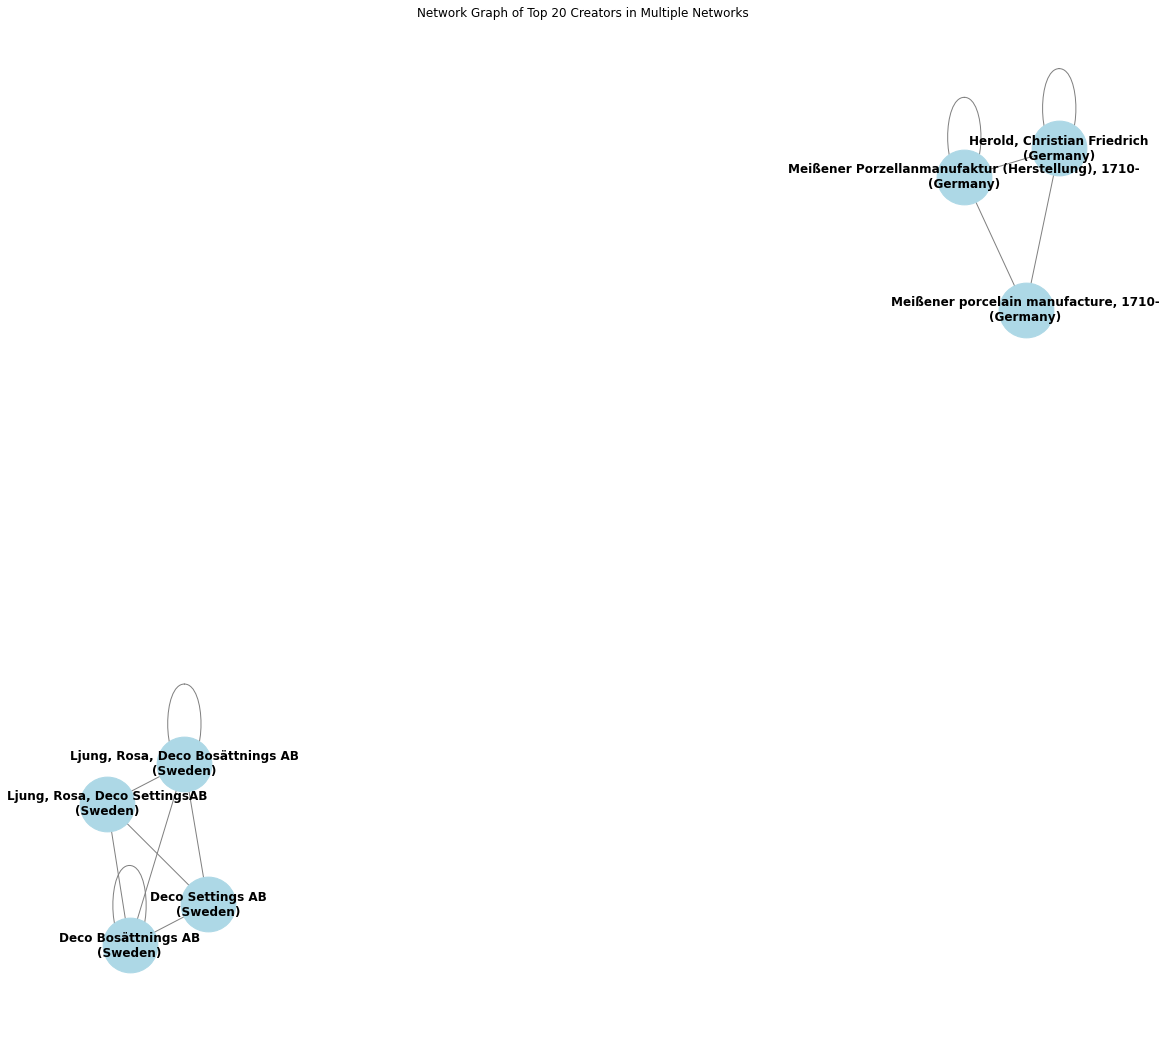

<Figure size 432x288 with 0 Axes>

In [54]:
import json
from collections import Counter, defaultdict
import re
import networkx as nx
import matplotlib.pyplot as plt

# Define a regex pattern to identify possible excluded terms
excluded_terms = {
    'Unknown', 'Unknown (ceramist)', 'Unknown (ceramic)', 'inconnu', 'inconnu (céramiste)', 'inconnu (céramique)',
    '未知', '未知 (陶艺家)', '不明', '不明 (陶艺家)', '未知 (陶瓷)', 'Unknown (陶瓷)', 'Unknown (陶艺家)',
    'missing', 'manquant', 'absent','onbekend','onbekend (keramist)','Meissen','Anoniem','#Unbekannter_Künstler_Künstler','Unbekannter Künstler (Künstler/in)'
}
pattern = re.compile(r'|'.join(re.escape(term) for term in excluded_terms), re.IGNORECASE)

# Load your JSON data
with open('chinese_porcelain_metadata.json', 'r') as file:
    data = json.load(file)

# Extract creator information, excluding terms in the excluded_terms list
creators = []
creator_countries = defaultdict(set)
for item in data:
    if 'dcCreator' in item and isinstance(item['dcCreator'], list):
        for creator in item['dcCreator']:
            if not pattern.search(creator):
                creators.append(creator)
                if 'country' in item and isinstance(item['country'], list):
                    for country in item['country']:
                        creator_countries[creator].add(country)

# Count occurrences of each creator and get the top 20
creator_counts = Counter(creators)
top_20_creators = dict(creator_counts.most_common(20))

# Build a network graph for the top 20 creators
G = nx.Graph()

# Add nodes for top 20 creators with their countries as node attributes
for creator in top_20_creators:
    G.add_node(creator, countries=', '.join(creator_countries.get(creator, [])))

# Add edges between creators based on shared countries
for item in data:
    if 'dcCreator' in item and isinstance(item['dcCreator'], list):
        item_creators = [creator for creator in item['dcCreator'] if creator in top_20_creators]
        if len(item_creators) > 2:
            for i in range(len(item_creators)):
                for j in range(i + 1, len(item_creators)):
                    G.add_edge(item_creators[i], item_creators[j])

# Find connected components and filter out those in multiple networks
connected_components = list(nx.connected_components(G))
multiple_networks_nodes = set()
for component in connected_components:
    if len(component) > 1:
        multiple_networks_nodes.update(component)

# Create a subgraph with only nodes in multiple networks
G_filtered = G.subgraph(multiple_networks_nodes).copy()

# Draw the network graph
plt.figure(figsize=(16, 14))
pos = nx.spring_layout(G_filtered, k=0.4, seed=42)  # Adjust k for better spacing
node_labels = {node: f"{node}\n({G.nodes[node]['countries']})" for node in G_filtered.nodes}
nx.draw(G_filtered, pos, with_labels=True, labels=node_labels, node_color='lightblue', node_size=3000, edge_color='gray', font_size=12, font_weight='bold')
plt.title('Network Graph of Top 20 Creators in Multiple Networks')
plt.show()

# Optionally, save the network graph to a file
plt.savefig('top_20_creators_multiple_networks.png', format='png', bbox_inches='tight')

In [61]:
!pip install langdetect

     |████████████████████████████████| 981 kB 495 kB/s eta 0:00:01
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=5aed827d9bf5f87dcbe005cdcebf79729c60ca376a13f3e360853973377dd866
  Stored in directory: /Users/shangliujun/Library/Caches/pip/wheels/d1/c1/d9/7e068de779d863bc8f8fc9467d85e25cfe47fa5051fff1a1bb
Successfully built langdetect


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/shangliujun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


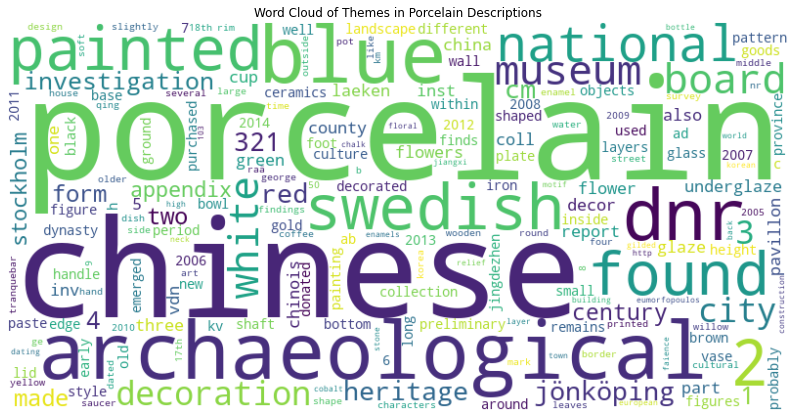

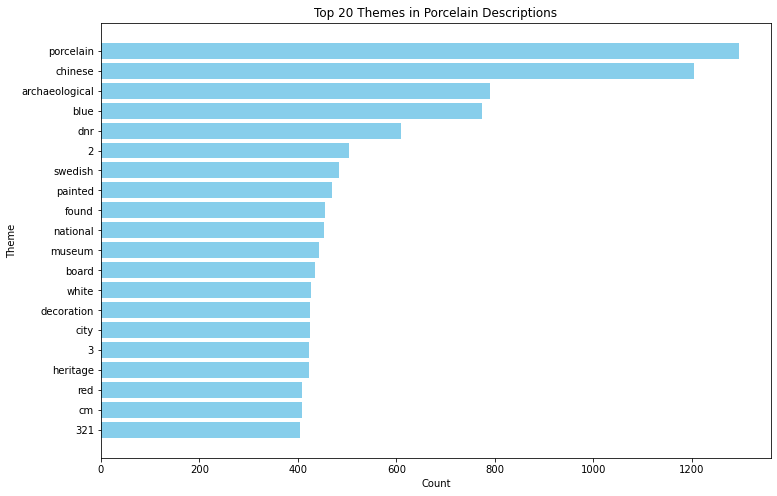

In [63]:
import json
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from langdetect import detect, DetectorFactory
from nltk.corpus import stopwords
import nltk

# Download the stopwords list
nltk.download('stopwords')

# Fix for language detection randomness
DetectorFactory.seed = 0

# Define stop words
stop_words = set(stopwords.words('english'))  # NLTK's English stopwords list
stop_words.update([
    'the', 'on', 'to', 'a', 'an', 'and', 'of', 'in', 'for', 'with', 'as', 'by', 'at', 'from', 'that', 'which', 'or', 'but', 'so', 'if', 'when', 'where', 'there', 'it', 'is', 'are', 'was', 'were', 'will', 'would', 'should', 'could'
])

# Define additional meaningless terms
meaningless_terms = set([
    # Any additional terms you want to exclude
])

# Load the JSON data
with open('chinese_porcelain_metadata.json', 'r') as file:
    data = json.load(file)

# Function to detect if a text is in English
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

# Extract English descriptions
english_descriptions = []
for item in data:
    if 'dcDescription' in item and isinstance(item['dcDescription'], list):
        for description in item['dcDescription']:
            if is_english(description):
                english_descriptions.append(description)

# Join all descriptions into a single text
all_descriptions = ' '.join(english_descriptions)

# Tokenize and remove stop words and meaningless terms
words = [word.lower() for word in re.findall(r'\b\w+\b', all_descriptions)
         if word.lower() not in stop_words and word.lower() not in meaningless_terms]

# Count word occurrences
word_counts = Counter(words)

# Check if there are any words to display
if not word_counts:
    print("No meaningful words available to generate a word cloud.")
else:
    # Create a word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate_from_frequencies(word_counts)

    # Display the word cloud
    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Word Cloud of Themes in Porcelain Descriptions')
    plt.show()

    # Bar Chart for Top Words
    top_words = dict(word_counts.most_common(20))

    plt.figure(figsize=(12, 8))
    plt.barh(list(top_words.keys()), list(top_words.values()), color='skyblue')
    plt.xlabel('Count')
    plt.ylabel('Theme')
    plt.title('Top 20 Themes in Porcelain Descriptions')
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.show()